In [1]:
import cv2
import imageio
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import scipy
import scipy.sparse
import scipy.sparse.linalg

In [3]:
frame_folder = 'Movie/lake_gray'
#frame_list = ['videoTestDecomposedFrame135.jpg','videoTestDecomposedFrame30.jpg','videoTestDecomposedFrame31.jpg','videoTestDecomposedFrame32.jpg','videoTestDecomposedFrame33.jpg','videoTestDecomposedFrame34.jpg','videoTestDecomposedFrame35.jpg','videoTestDecomposedFrame36.jpg','videoTestDecomposedFrame37.jpg','videoTestDecomposedFrame38.jpg','videoTestDecomposedFrame39.jpg','videoTestDecomposedFrame40.jpg']
frame_list = ['frame31.png','frame32.png','frame33.png','frame34.png','frame35.png','frame36.png','frame37.png','frame38.png',]

In [4]:
class get_color:
    def __init__(self,frame, folder):
        self.img = cv2.imread(os.path.join(folder,frame))
        self.img = self.img[:,:,::-1]
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        self.yuv = cv2.cvtColor(self.img, cv2.COLOR_BGR2YUV)
        self.y, self.u, self.v = cv2.split(self.yuv)

In [5]:
class find_neighbor:
    def __init__(self,center, pic_y, next_y,flow, n_frame):
        self.center = center
        self.pic_y = pic_y
        self.next_y = next_y
        self.rows, self.cols = self.pic_y.shape
        self.pic_size = self.rows*self.cols
        self.n_frame = n_frame
        self.width = 1
        self.neighbors = []
        self.mean = None
        self.var = None
        self.findneighbors()
        # self.y = [r,c, y]
        self.neighbors = np.array(self.neighbors).astype(float)
        self.cal_weight()
        
    def findneighbors(self):
        r_start = max(0, self.center[0]-self.width)
        r_end = min(self.pic_y.shape[0],self.center[0] + self.width +1)
        c_start = max(0, self.center[1]-self.width)
        c_end = min(self.pic_y.shape[1],self.center[1] + self.width +1)
        
        n_r_start = max(0, self.center[0]-self.width+int(flow[self.center[0],self.center[1],0]))
        n_r_end = min(self.pic_y.shape[0],self.center[0] + self.width +1+int(flow[self.center[0],self.center[1],0]))
        n_c_start = max(0, self.center[1]-self.width+int(flow[self.center[0],self.center[1],1]))
        n_c_end = min(self.pic_y.shape[1],self.center[1] + self.width +1+int(flow[self.center[0],self.center[1],1]))
        
        p_r_start = max(0, self.center[0]-self.width-int(flow[self.center[0],self.center[1],0]))
        p_r_end = min(self.pic_y.shape[0],self.center[0] + self.width +1-int(flow[self.center[0],self.center[1],0]))
        p_c_start = max(0, self.center[1]-self.width-int(flow[self.center[0],self.center[1],1]))
        p_c_end = min(self.pic_y.shape[1],self.center[1] + self.width +1-int(flow[self.center[0],self.center[1],1]))
        
        if self.n_frame==0:
            for r in range(r_start, r_end):
                for c in range(c_start, c_end):
                    if r == self.center[0] and c == self.center[1]:
                        continue
                    self.neighbors.append([r*self.cols+c,self.pic_y[r,c]])
            for r in range(n_r_start, n_r_end):
                for c in range(n_c_start, n_c_end):
                    self.neighbors.append([self.pic_size+r*self.cols+c,self.next_y[r,c]])
                    #print(r_start+int(flow[self.center[0],self.center[1],0]), r_end+int(flow[self.center[0],self.center[1],0]))
        else:
            for r in range(p_r_start, p_r_end):
                for c in range(p_c_start, p_c_end):
                    self.neighbors.append([r*self.cols+c,self.pic_y[r,c]])
            for r in range(r_start, r_end):
                for c in range(c_start, c_end):
                    if r == self.center[0] and c == self.center[1]:
                        continue
                    self.neighbors.append([self.pic_size+r*self.cols+c,self.next_y[r,c]])
                
    def cal_weight(self):
        if self.n_frame==0:
            diff = self.neighbors[:,1] - self.pic_y[self.center]
        else:
            diff = self.neighbors[:,1] - self.next_y[self.center]
        self.var = np.var(diff)
        if self.var<1e-6:
            self.var = 1e-6
        if all(diff== np.mean(diff)) :
            w_ = [-1/len(diff) for i in range(len(diff))]
        else:
            w = np.exp(- np.power(diff,2) / (self.var* 2.0))
            if np.sum(w)==0:
                w_ = [-1/len(diff) for i in range(len(diff))]
            else:
                w_ = - w / np.sum(w)
        self.neighbors[:,1] = w_
        '''
            if (self.center[0]==126 and self.center[1]==167):
                print("=====diff")
                print(diff)
                print("=====w")
                print(w)
                print("=====sum")
                print(sum(w))
                print("=====w_")
                print(w_)
        '''
        
        
        
        

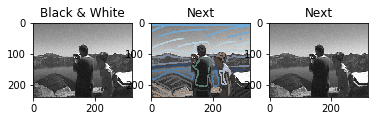

get weight
Optimizing Ax=b
Optimized Ax=b


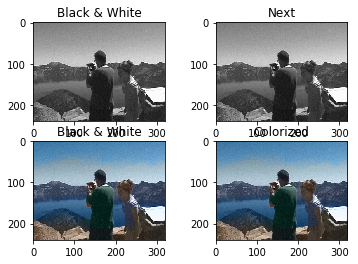

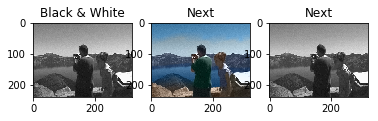

get weight
Optimizing Ax=b
Optimized Ax=b


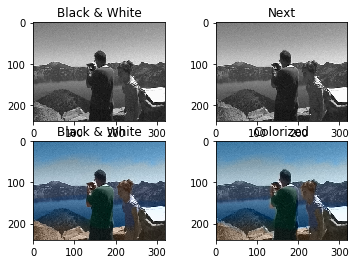

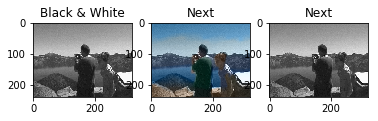

get weight
Optimizing Ax=b
Optimized Ax=b


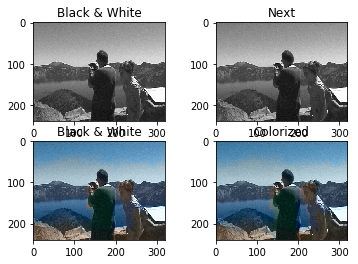

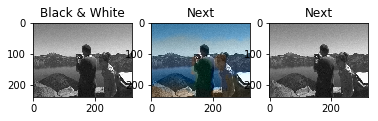

get weight
Optimizing Ax=b
Optimized Ax=b


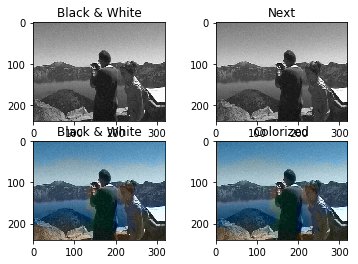

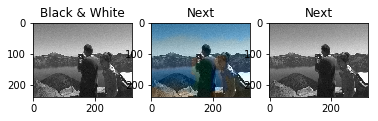

get weight
Optimizing Ax=b
Optimized Ax=b


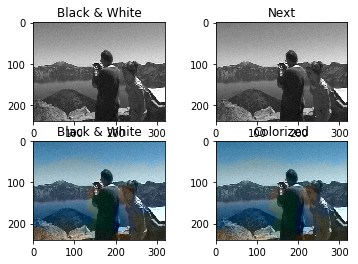

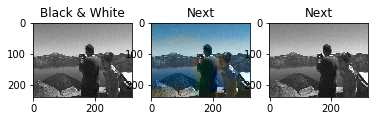

get weight
Optimizing Ax=b
Optimized Ax=b


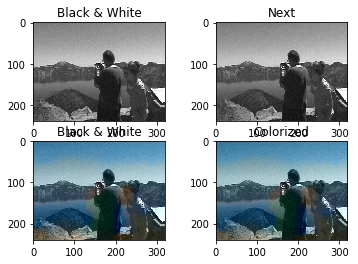

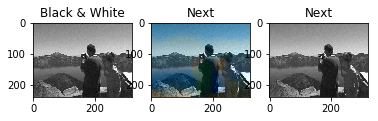

get weight
Optimizing Ax=b
Optimized Ax=b


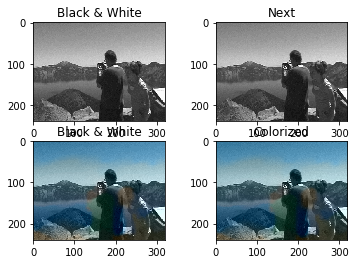

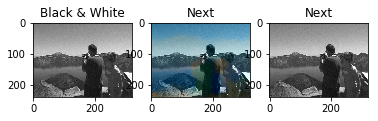

get weight
Optimizing Ax=b
Optimized Ax=b


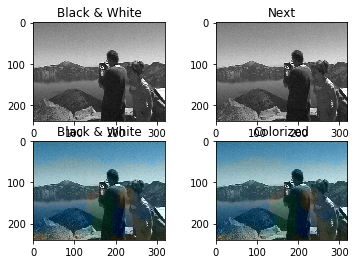

In [6]:
pre_f = get_color('frame31.png',frame_folder)
color_f = get_color('repaint.png','Movie')

count = 0

for f in frame_list:
    next_f = get_color(f,frame_folder)
    flow = cv2.calcOpticalFlowFarneback(pre_f.gray, next_f.gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    fig = plt.figure()
    fig.add_subplot(1,3,1).set_title('Black & White')
    imgplot = plt.imshow(pre_f.img)
    fig.add_subplot(1,3,2).set_title('Next')
    imgplot = plt.imshow(color_f.img)
    fig.add_subplot(1,3,3).set_title('Next')
    imgplot = plt.imshow(next_f.img)
    
    plt.show()
    
    (rows,cols,_) = pre_f.img.shape
    pic_size = rows*cols

    color_point = (color_f.u - pre_f.u) > 1e-5
    
    weight =[]
    b_u = np.zeros(2*pic_size)
    b_v = np.zeros(2*pic_size)
    
    print('get weight')
    for i in range(2):
        for r in range(rows):
            for c in range(cols):
                if (color_point[r,c] and i==0):
                    b_u[r*cols+c] = color_f.u[r,c]
                    b_v[r*cols+c] = color_f.v[r,c]
                else:
                    w= find_neighbor((r,c),pre_f.y,next_f.y,flow,i)
                    for e in w.neighbors:
                        weight.append([i*pic_size+r*cols+c,e[0],e[1]])
                        if np.isnan(e[1]):
                            print(r,c,e[1])
                weight.append([i*pic_size+r*cols+c,i*pic_size+r*cols+c,1.]) 

    weight = np.array(weight)

    matA = scipy.sparse.csr_matrix((weight[:,2], (weight[:,0], weight[:,1])), shape=(2*pic_size, 2*pic_size))
    
    print('Optimizing Ax=b')
    ansU = scipy.sparse.linalg.spsolve(matA, b_u)
    ansV = scipy.sparse.linalg.spsolve(matA, b_v)

    preU = ansU[0:pic_size].reshape(rows,cols)
    preV = ansV[0:pic_size].reshape(rows,cols)

    nextU = ansU[pic_size::].reshape(rows,cols)
    nextV = ansV[pic_size::].reshape(rows,cols)

    ans_yuv = np.dstack((pre_f.y,preU,preV)).astype(np.uint8)
    next_yuv = np.dstack((next_f.y,nextU,nextV)).astype(np.uint8)
    
    ans_rgb=cv2.cvtColor(ans_yuv,cv2.COLOR_YUV2BGR)
    next_rgb=cv2.cvtColor(next_yuv,cv2.COLOR_YUV2BGR)
    print('Optimized Ax=b')
    
    fig = plt.figure()
    fig.add_subplot(2,2,1).set_title('Black & White')
    imgplot = plt.imshow(pre_f.img)
    fig.add_subplot(2,2,2).set_title('Next')
    imgplot = plt.imshow(next_f.img)

    fig.add_subplot(2,2,3).set_title('Black & White')
    imgplot = plt.imshow(ans_rgb)
    fig.add_subplot(2,2,4).set_title('Colorized')
    imgplot = plt.imshow(next_rgb)

    plt.show()
    
    ans_rgb =ans_rgb[:,:,::-1]
    next_rgb =next_rgb[:,:,::-1]
    cv2.imwrite('data/data_result/frame%d.png' % count,ans_rgb)
    cv2.imwrite('data/data_result/frame%d.png' % (count+1),next_rgb)
    
    pre_f = get_color(f,frame_folder) # pre_f = next_f
    color_f = get_color('frame%d.png' % (count+1),'data/data_result')
    count = count+1
    

In [7]:
image_folder = 'data/data_result'
video_name = 'lake4_video.mov'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc,2, (width,height))

for image in images:
    print(image)
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

frame0.png
frame1.png
frame2.png
frame3.png
frame4.png
frame5.png
frame6.png
frame7.png
frame8.png


In [8]:
'''
frame = cv2.imread(os.path.join(image_folder, images[0]))
frame2 = cv2.imread(os.path.join(image_folder, images[5]))

fig.add_subplot(1,2,1).set_title('Black & White')
imgplot = plt.imshow(frame2)
'''

"\nframe = cv2.imread(os.path.join(image_folder, images[0]))\nframe2 = cv2.imread(os.path.join(image_folder, images[5]))\n\nfig.add_subplot(1,2,1).set_title('Black & White')\nimgplot = plt.imshow(frame2)\n"

In [9]:
'''
import cv2

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img3 = cv2.imread('3.jpg')

height , width , layers =  img1.shape

video = cv2.VideoWriter('video.avi',-1,1,(width,height))

video.write(img1)
video.write(img2)
video.write(img3)

cv2.destroyAllWindows()
video.release()
'''

"\nimport cv2\n\nimg1 = cv2.imread('1.jpg')\nimg2 = cv2.imread('2.jpg')\nimg3 = cv2.imread('3.jpg')\n\nheight , width , layers =  img1.shape\n\nvideo = cv2.VideoWriter('video.avi',-1,1,(width,height))\n\nvideo.write(img1)\nvideo.write(img2)\nvideo.write(img3)\n\ncv2.destroyAllWindows()\nvideo.release()\n"

In [10]:
'''
capture = cv2.VideoCapture("craterLake.mov")
count = 0
while True:
    gotImage, image = capture.read()
    if (gotImage):
        cv2.imwrite("videoTestDecomposedFrame%d.jpg" %count, image)
        count += 1
    else:
        break
'''

'\ncapture = cv2.VideoCapture("craterLake.mov")\ncount = 0\nwhile True:\n    gotImage, image = capture.read()\n    if (gotImage):\n        cv2.imwrite("videoTestDecomposedFrame%d.jpg" %count, image)\n        count += 1\n    else:\n        break\n'

In [11]:
'''
from PIL import Image, ImageSequence

im = Image.open('craterLake.mov')

index = 1
for frame in ImageSequence.Iterator(im):
    frame.save("data_frame%d.png" % index)
    index += 1
'''

'\nfrom PIL import Image, ImageSequence\n\nim = Image.open(\'craterLake.mov\')\n\nindex = 1\nfor frame in ImageSequence.Iterator(im):\n    frame.save("data_frame%d.png" % index)\n    index += 1\n'